In [1]:
#Notebook for Data Analysis

#Notebooks for data exploration and cleanup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 
import warnings
import matplotlib
import datetime as dt
from matplotlib.dates import DateFormatter
import gmaps
from config import gkey

warnings.filterwarnings("ignore")

#For the x-axis in charts
years = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

<h1>Analysis - Substance Abuse and Mental Health</h1>

<h1>Analysis - Substance Abuse Treatment</h1>

Has the legalization of marijuana resulted in more admissions for substance abuse treatment in Colorado?

In [2]:
# Load data files generated in the exploration and cleanup phase.
colorado_data = pd.read_csv("Data/colorado_use_data.csv", index_col=0)
us_data = pd.read_csv("Data/US_full_use_data.csv", index_col=0)

In [3]:
us_data.head()

,ADMYR,SUB1,count_primary,count_secondary,count_tertiary
0,2005,1,6518,195516,315073
1,2005,2,179564,59552,18269
2,2005,3,64962,40607,14117
3,2005,4,69677,60804,21010
4,2005,5,22304,3427,1575


In [4]:
# sum the counts columns to arrive at a total_count for both datasets
colorado_data['count_total'] = colorado_data['count_primary'] +  colorado_data['count_secondary'] + colorado_data['count_tertiary']
us_data['count_total'] = us_data['count_primary'] +  us_data['count_secondary'] + us_data['count_tertiary']

# create percent_adm as total admissions for substance divided by the total by year

# need total per year
colorado_year_total = pd.DataFrame(colorado_data.groupby(['ADMYR'])['count_total'].sum())
us_year_total = pd.DataFrame(us_data.groupby(['ADMYR'])['count_total'].sum())
colorado_year_total.rename(columns={"count_total": "year_total"},inplace=True)
us_year_total.rename(columns={"count_total": "year_total"},inplace=True)

In [5]:
# create new percentage field using the above data to show the percentage of that year's admissions for each substance
colorado_data = colorado_data.merge(colorado_year_total, left_on='ADMYR', right_on='ADMYR', how='outer', validate='many_to_one')
us_data = us_data.merge(us_year_total, left_on='ADMYR', right_on='ADMYR', how='outer', validate='many_to_one')

colorado_data['percent_total'] = (colorado_data['count_total']/colorado_data['year_total']) * 100
us_data['percent_total'] = (us_data['count_total']/us_data['year_total']) * 100

In [6]:
# Create multiline plot showing different substance abuse
# Pull Marijuana data only
colorado_marijuana = colorado_data.loc[colorado_data['SUB1'] == 4]
us_marijuana = us_data.loc[us_data['SUB1'] == 4]

# create lists for plotting
colorado_list = colorado_marijuana['percent_total'].to_list()
us_list = us_marijuana['percent_total'].to_list()

colorado_num = colorado_marijuana['count_total'].to_list()
us_num = us_marijuana['count_total'].to_list()

In [7]:
# Set x-axis
x_axis = np.arange(2005,2019, 1)

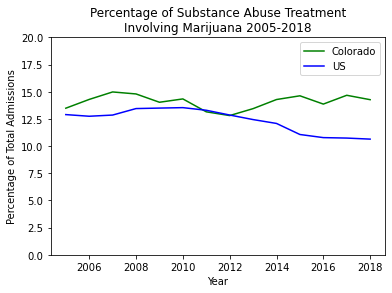

In [8]:
# Create percentage plot
colorado, = plt.plot(x_axis, colorado_list, 'green', label="Colorado")
us, = plt.plot(x_axis, us_list, 'blue', label="US")
# add styling
plt.title("Percentage of Substance Abuse Treatment\nInvolving Marijuana 2005-2018")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Admissions")
plt.ylim(0,20)
plt.legend(handles=[colorado, us], loc="best")
plt.savefig("Output/percentage_marijuana_sub_abuse_admissions")
plt.show()

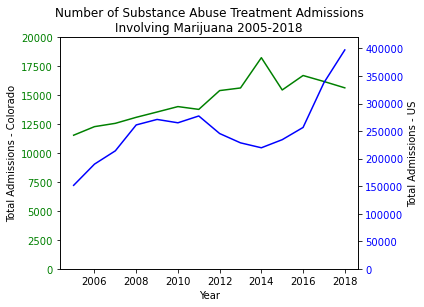

In [9]:
# Create total_count plot
#colorado_count, = plt.plot(x_axis, colorado_num, 'green', label="Colorado")
#us_count, = plt.plot(x_axis, us_num, 'blue', label="US")

# Since the numbers are vastly different for Colorado and the entire U.S., we need a two-scale plot that will show the 
# data more accurately.
fig, ax1 = plt.subplots()
ax1.set_ylabel('Total Admissions - Colorado')
ax1.plot(x_axis, colorado_num, 'green', label='Colorado')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xlabel('Year')
ax1.set_ylim(0,20000)
         
ax2 = ax1.twinx() #instantiate a second axis that shared the same x-axis
ax2.set_ylabel('Total Admissions - US')
ax2.plot(x_axis, us_num, 'blue', label='US')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0,420000)
         
fig.tight_layout()
plt.title("Number of Substance Abuse Treatment Admissions\nInvolving Marijuana 2005-2018")

plt.savefig("Output/totNumber_marijuana_sub_abuse_admissions.png", bbox_inches='tight')
plt.show()




<h1>Analysis - Crime Rates</h1>

<h1>Analysis - Economic Factors</h1>

<h2>Marijuana Sales and Economic Benefits</h2>
Retail and Medical sales for Marijuana hit a record of 1.75 Billion in 2019. Colorado has the fastest growing economy in the United States and Colorado's unemployment rate is at a six-year low. Colorado has almost 3000 licensed businesses and over 41,000 individuals licensed to work in the industry.

Colorado's tourism rose sustantially. According to a report from SMARInsights, 25% of people who traveled to Colorado between 2013-2018 listed cannabis as a reason. Legalization revenue now accoutns for roughly 3% of the state's 30 billion budget.

Companies have made more than 6.5 billion in sales over the last five years.

In [10]:
#Load Marijuana Sales Revenue csv
sales_df = pd.read_csv("Resources/marijuana_sales.csv", dtype="object", encoding="utf-8")
sales_df

,Sales Month,Monthly Sales,Year to Date,Monthly Sales.1,Year to Date.1,Monthly Sales.2,Year to Date.2,Total to Date
0,1/1/2014,"$32,541,720","$32,541,720","$14,022,213","$14,022,213","$46,563,933","$46,563,933","$46,563,933"
1,2/1/2014,"$31,738,572","$64,280,292","$14,248,473","$28,270,686","$45,987,045","$92,550,978","$92,550,978"
2,3/1/2014,"$34,821,878","$99,102,170","$19,881,631","$48,152,317","$54,703,509","$147,254,487","$147,254,487"
3,4/1/2014,"$32,686,869","$131,789,039","$20,765,986","$68,918,303","$53,452,855","$200,707,342","$200,707,342"
4,5/1/2014,"$31,355,208","$163,144,247","$21,375,001","$90,293,304","$52,730,209","$253,437,551","$253,437,551"
...,...,...,...,...,...,...,...,...
76,5/1/2020,"$42,989,322","$166,433,459","$149,186,615","$613,043,515","$192,175,937","$779,476,974","$8,567,179,368"
77,6/1/2020,"$40,770,582","$207,204,042","$158,102,628","$771,146,143","$198,873,210","$978,350,185","$8,766,052,578"
78,7/1/2020,"$43,268,565","$250,472,606","$183,106,003","$954,252,146","$226,374,568","$1,204,724,752","$8,992,427,145"
79,8/1/2020,"$42,034,746","$292,507,353","$176,566,595","$1,130,818,741","$218,601,341","$1,423,326,094","$9,211,028,487"


In [11]:
x = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
x_axis = np.arange(2014, 2021, 1)
x_axis

array([2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [12]:
y = [0, 50, 100, 150, 200, 250, 300]
y_axis = np.arange(0, 350, 50)
y_axis

array([  0,  50, 100, 150, 200, 250, 300])

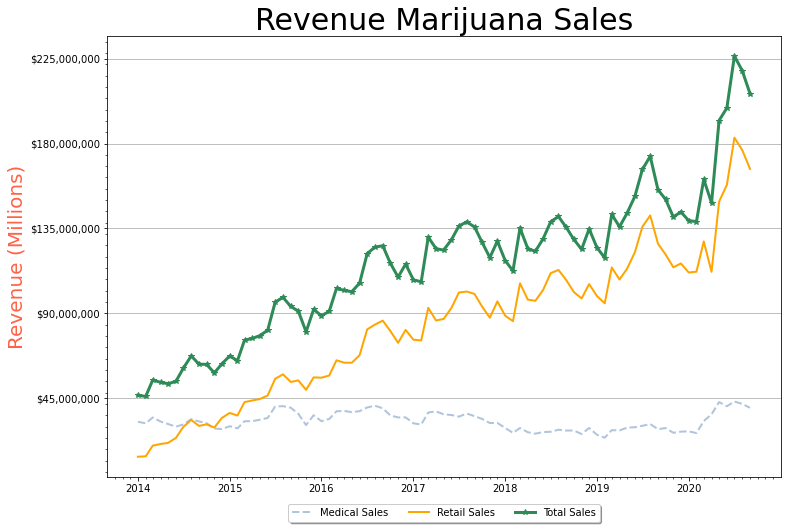

In [13]:
import matplotlib.dates as mdate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator, StrMethodFormatter)

# Get data correctly from pandas
dates = sales_df["Sales Month"].values
x_values = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in dates]
y_values1 = sales_df["Monthly Sales"].replace('[\$,]', '', regex=True).astype(float)
y_values2 = sales_df["Monthly Sales.1"].replace('[\$,]', '', regex=True).astype(float)
y_values3 = sales_df["Monthly Sales.2"].replace('[\$,]', '', regex=True).astype(float)

# Formates date to Month-Year
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(mdate.YearLocator())
ax.xaxis.set_minor_locator(mdate.MonthLocator())

ax.yaxis.set_major_locator(MultipleLocator(45000000))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_minor_locator(MultipleLocator(6000000))

# Plots data
plt.plot(x_values, y_values1, "b--", lw=2, color = "lightsteelblue", label = "Medical Sales")
plt.plot(x_values, y_values2, color = "orange", lw=2, label = "Retail Sales")
plt.plot(x_values, y_values3, color = "seagreen",marker ="*", lw=3, label = "Total Sales")

#create title, xaxis, and yaxis
plt.title("Revenue Marijuana Sales", fontsize = 30)
#plt.xlabel("Year", fontsize = 20, color = "tomato" )
plt.ylabel("Revenue (Millions)", fontsize = 20, color="tomato")
plt.tight_layout()

# plays with size
axes = plt.gca()
axes.yaxis.grid()
fig.set_size_inches(14,8)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

#save image
plt.savefig("Images/marijuana_sale.png")
plt.show()

# Marijuana Tax Revenue

Starting every Fiscal Year(FY) dating back to 2015, the first 40 million of the Retail Marijuana Excise Tax revenue was distributed back to the Public School Capital Construction Assistance Fund (PSCCAF).  Any excess will be transferred to the Public School Fund.  

Of the marijuana tax revenue already collected, the Colorado joint budget committee set aside 2.5 million to increase the number of health professionals in Colorado public schools.  In November 2014, the state awarded the first 975,000 in grants to Colorado schools to be used to hire health professionals.

The funds help fill a critical gap in Colorado school districts, which suffer from a shortage of school health workers due to 2011 budget cuts.  Many of the newly hired health workers, including nurses and social workers, will focus on mental health support and on programs to educate students about drug use.

The marijuana tax cash fund (71.85% of the 90% State Share), which receives the largest share of cannabis-related revenue, must be used for health care, health education, substance abuse prevention and treatment programs, and law enforcement.

In [14]:
#Load Marijuana Tax Revenue csv
tax_df = pd.read_csv("Resources/marijuana_tax.csv", dtype="object", encoding="utf-8")
tax_df

,Date,State Sales Tax,Retail Sales Tax,Retail Excise Tax (15%),License & Fees,Total Taxes & Fees,Total to Date
0,2/1/2014,"$1,330,209","$1,401,568","$195,318","$592,661","$3,519,756","$3,519,756"
1,3/1/2014,"$1,460,429","$1,434,916","$339,615","$857,615","$4,092,575","$7,612,330"
2,4/1/2014,"$1,569,405","$1,898,685","$609,907","$902,995","$4,980,992","$12,593,322"
3,5/1/2014,"$1,559,710","$2,217,607","$734,351","$761,687","$5,273,355","$17,866,677"
4,6/1/2014,"$1,569,454","$2,070,577","$1,135,648","$940,028","$5,715,707","$23,582,384"
...,...,...,...,...,...,...,...
76,6/1/2020,"$1,287,667","$22,814,211","$8,454,927","$1,067,803","$33,624,609","$1,375,145,032"
77,7/1/2020,"$1,288,715","$24,644,660","$9,381,481","$814,882","$36,129,738","$1,411,274,770"
78,8/1/2020,"$1,433,419","$27,794,380","$10,470,917","$996,898","$40,695,613","$1,451,970,383"
79,9/1/2020,"$1,339,939","$26,656,923","$9,682,085","$947,467","$38,626,414","$1,490,596,797"


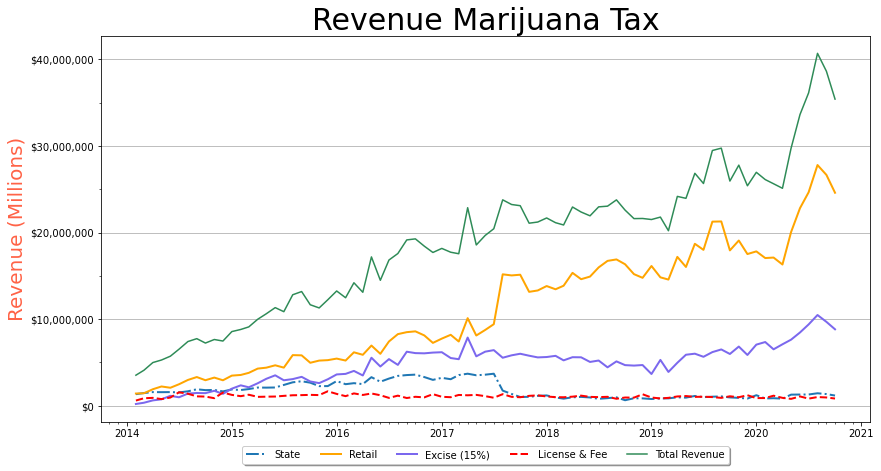

In [15]:
# Get data correctly from pandas
dates = tax_df["Date"].values
x_values = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in dates]
y_values1 = tax_df["State Sales Tax"].replace('[\$,]', '', regex=True).astype(float)
y_values2 = tax_df["Retail Sales Tax "].replace('[\$,]', '', regex=True).astype(float)
y_values3 = tax_df["Retail Excise Tax (15%)"].replace('[\$,]', '', regex=True).astype(float)
y_values4 = tax_df["License & Fees"].replace('[\$,]', '', regex=True).astype(float)
y_values5 = tax_df["Total Taxes & Fees"].replace('[\$,]', '', regex=True).astype(float)


fig, ax = plt.subplots()

ax.xaxis.set_major_locator(mdate.YearLocator())
ax.xaxis.set_minor_locator(mdate.MonthLocator())

ax.yaxis.set_major_locator(MultipleLocator(10000000))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_minor_locator(MultipleLocator(5000000))


# Plots data
plt.plot(x_values, y_values1, "-.", lw = 2, label = "State")
plt.plot(x_values, y_values2, "-", color = "orange", lw = 2, label = "Retail")
plt.plot(x_values, y_values3,"-", color = "mediumslateblue", lw = 2, label = "Excise (15%)")
plt.plot(x_values, y_values4, "--", lw = 2, color = "red", label = "License & Fee")
plt.plot(x_values, y_values5, color="seagreen", label = "Total Revenue")

#create title, xaxis, and yaxis
plt.title("Revenue Marijuana Tax", fontsize = 30)
#plt.xlabel("Year", fontsize = 20, color = "tomato" )
plt.ylabel("Revenue (Millions)", fontsize = 20, color="tomato")
plt.tight_layout()

# plays with size
axes = plt.gca()
axes.yaxis.grid()
fig.set_size_inches(15,7)

# Legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

#save image
plt.savefig("Images/marijuana_tax.png")
plt.show()

## Economic Impact -- Employement, Retail & Medical Sales


In [16]:
# Read CSV
CO_Medical = pd.read_csv("Data/Stores - Medical.csv")
CO_Retail = pd.read_csv("Data/Stores - Retail.csv")
Lat_Long = pd.read_csv("Data/us-zip-code-latitude-and-longitude.csv", sep=';')
State_Employment = pd.read_csv("Data/EmploymentByState.csv")

In [17]:
# Check Medical DataFrame
CO_Medical.head()

,LicenseNumber,FacilityName,DBA,FacilityType,City,ZipCode,DateUpdated
0,402-00001,ALLGREENS LLC,NaN,MMC,Denver,80204,2020-12-01
1,402-00002,ALTERNATIVE MEDICINE ON CAPITOL HILL LLC,NaN,MMC,Denver,80218,2020-12-01
2,402-00005,P2C3 LLC,THE SECRET STASH,MMC,Colorado Springs,80904,2020-12-01
3,402-00008,HERBAL OUTFITTERS LLC,THE GREEN JOINT,MMC,Rifle,81650,2020-12-01
4,402-00011,JGB VENTURES LLC,DANK,MMC,Denver,80207,2020-12-01


In [18]:
# Check Retail Data Frame
CO_Retail.head()

,LicenseNumber,FacilityName,DBA,FacilityType,City,ZipCode,DateUpdated
0,402R-00004,JGB VENTURES LLC,DANK,Retail Marijuana Store,Denver,80207,2020-12-01
1,402R-00005,CANOSA PROPERTY INVESTMENTS LLC,BOTANICO 2,Retail Marijuana Store,Denver,80204,2020-12-01
2,402R-00002,CENTRAL LLC,BONFIRE CANNABIS,Retail Marijuana Store,Central City,80427,2020-12-01
3,402R-00003,5110 SANCTUARY LLC,EVERBLOOM,Retail Marijuana Store,Denver,80216,2020-12-01
4,402R-00007,L3ASTOCKCOMPLEX LLC,EUFLORA,Retail Marijuana Store,Denver,80216,2020-12-01


In [19]:
CO_All_Types = pd.concat([CO_Retail, CO_Medical])
CO_All_Types

,LicenseNumber,FacilityName,DBA,FacilityType,City,ZipCode,DateUpdated
0,402R-00004,JGB VENTURES LLC,DANK,Retail Marijuana Store,Denver,80207,2020-12-01
1,402R-00005,CANOSA PROPERTY INVESTMENTS LLC,BOTANICO 2,Retail Marijuana Store,Denver,80204,2020-12-01
2,402R-00002,CENTRAL LLC,BONFIRE CANNABIS,Retail Marijuana Store,Central City,80427,2020-12-01
3,402R-00003,5110 SANCTUARY LLC,EVERBLOOM,Retail Marijuana Store,Denver,80216,2020-12-01
4,402R-00007,L3ASTOCKCOMPLEX LLC,EUFLORA,Retail Marijuana Store,Denver,80216,2020-12-01
...,...,...,...,...,...,...,...
426,402-01324,EXIT 243 LLC,DISPENSARY EXIT 243,MMC,Idaho Springs,80452,2020-12-01
427,402-01331,MAGGIES FARM LLC,MAGGIE'S FARM,MMC,Las Animas,81054,2020-12-01
428,402-01328,SISTEM COMMERCE CITY LLC,SILVER STEM FINE CANNABIS,MMC,Commerce City,80022,2020-12-01
429,402-01330,2251SB LLC,APOTHECARY FARMS,MMC,Colorado Springs,80909,2020-12-01


In [20]:
CO_Facility_Zip = CO_All_Types.groupby(['ZipCode','FacilityType']).size().reset_index(name='counts')
CO_Facility_Zip

,ZipCode,FacilityType,counts
0,80002,Retail Marijuana Store,1
1,80010,Retail Marijuana Store,5
2,80011,Retail Marijuana Store,5
3,80012,Retail Marijuana Store,2
4,80013,Retail Marijuana Store,1
...,...,...,...
246,81635,Retail Marijuana Store,7
247,81639,Retail Marijuana Store,1
248,81650,MMC,2
249,81650,Retail Marijuana Store,2


In [21]:
# Check zip code data 
# Source - https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/?location=2,43.25174,-72.87322&basemap=jawg.streets
Lat_Long

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,66025,Eudora,KS,38.917032,-95.064550,-6,1,"38.917032,-95.06455"
1,74565,Savanna,OK,34.831398,-95.839670,-6,1,"34.831398,-95.83967"
2,75631,Beckville,TX,32.237924,-94.464270,-6,1,"32.237924,-94.46427"
3,92067,Rancho Santa Fe,CA,33.016492,-117.202640,-8,1,"33.016492,-117.20264"
4,92119,San Diego,CA,32.802250,-117.024310,-8,1,"32.80225,-117.02431"
...,...,...,...,...,...,...,...,...
43186,25612,Chauncey,WV,37.766620,-81.987550,-5,1,"37.76662,-81.98755"
43187,59444,Galata,MT,48.635319,-111.240830,-7,1,"48.635319,-111.24083"
43188,60532,Lisle,IL,41.789079,-88.085360,-6,1,"41.789079,-88.08536"
43189,61638,Peoria,IL,40.796887,-89.611146,-6,1,"40.796887,-89.611146"


In [22]:
# Merge Store Data & With Zip Code
Master_Location_Data = CO_Facility_Zip.merge(Lat_Long, left_on ='ZipCode', right_on='Zip', how = 'left')
Master_Location_Data

,ZipCode,FacilityType,counts,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,80002,Retail Marijuana Store,1,80002.0,Arvada,CO,39.795006,-105.09810,-7.0,1.0,"39.795006,-105.0981"
1,80010,Retail Marijuana Store,5,80010.0,Aurora,CO,39.739387,-104.86210,-7.0,1.0,"39.739387,-104.8621"
2,80011,Retail Marijuana Store,5,80011.0,Aurora,CO,39.739737,-104.80905,-7.0,1.0,"39.739737,-104.80905"
3,80012,Retail Marijuana Store,2,80012.0,Aurora,CO,39.698387,-104.83956,-7.0,1.0,"39.698387,-104.83956"
4,80013,Retail Marijuana Store,1,80013.0,Aurora,CO,39.659105,-104.77910,-7.0,1.0,"39.659105,-104.7791"
...,...,...,...,...,...,...,...,...,...,...,...
246,81635,Retail Marijuana Store,7,81635.0,Parachute,CO,39.493283,-108.11571,-7.0,1.0,"39.493283,-108.11571"
247,81639,Retail Marijuana Store,1,81639.0,Hayden,CO,40.488060,-107.26093,-7.0,1.0,"40.48806,-107.26093"
248,81650,MMC,2,81650.0,Rifle,CO,39.603225,-107.89755,-7.0,1.0,"39.603225,-107.89755"
249,81650,Retail Marijuana Store,2,81650.0,Rifle,CO,39.603225,-107.89755,-7.0,1.0,"39.603225,-107.89755"


In [23]:
Master_Location_Data_Clean = Master_Location_Data.dropna()
Master_Location_Data_Clean

,ZipCode,FacilityType,counts,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,80002,Retail Marijuana Store,1,80002.0,Arvada,CO,39.795006,-105.09810,-7.0,1.0,"39.795006,-105.0981"
1,80010,Retail Marijuana Store,5,80010.0,Aurora,CO,39.739387,-104.86210,-7.0,1.0,"39.739387,-104.8621"
2,80011,Retail Marijuana Store,5,80011.0,Aurora,CO,39.739737,-104.80905,-7.0,1.0,"39.739737,-104.80905"
3,80012,Retail Marijuana Store,2,80012.0,Aurora,CO,39.698387,-104.83956,-7.0,1.0,"39.698387,-104.83956"
4,80013,Retail Marijuana Store,1,80013.0,Aurora,CO,39.659105,-104.77910,-7.0,1.0,"39.659105,-104.7791"
...,...,...,...,...,...,...,...,...,...,...,...
246,81635,Retail Marijuana Store,7,81635.0,Parachute,CO,39.493283,-108.11571,-7.0,1.0,"39.493283,-108.11571"
247,81639,Retail Marijuana Store,1,81639.0,Hayden,CO,40.488060,-107.26093,-7.0,1.0,"40.48806,-107.26093"
248,81650,MMC,2,81650.0,Rifle,CO,39.603225,-107.89755,-7.0,1.0,"39.603225,-107.89755"
249,81650,Retail Marijuana Store,2,81650.0,Rifle,CO,39.603225,-107.89755,-7.0,1.0,"39.603225,-107.89755"


In [24]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [25]:
# Store Lat & Long into  locations 
locations = Master_Location_Data_Clean[["Latitude", "Longitude"]]

# Convert # of locations to float and store

Count_of_locations = Master_Location_Data_Clean["counts"].astype(float)

In [26]:
# Create a loation Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=Count_of_locations, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
CO_Facility_Weight = CO_All_Types.groupby(['FacilityType']).size().reset_index(name='counts')
CO_Facility_Weight

,FacilityType,counts
0,MMC,431
1,Retail Marijuana Store,603


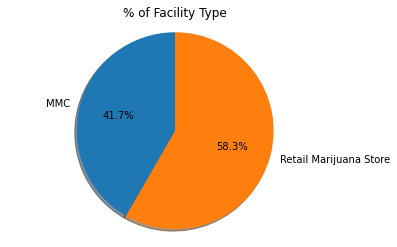

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = CO_Facility_Weight['FacilityType']
sizes = CO_Facility_Weight['counts']
explode = (0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("% of Facility Type")
plt.savefig('Images/FacilityPie.png', dpi=300)

plt.show()

In [29]:
State_Employment


,2017,2018,2019,2020
0,23407,26891,31486,34705


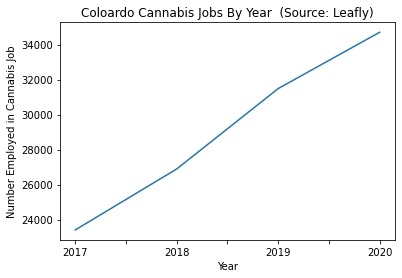

In [31]:
row = State_Employment.iloc[0]
#row.plot(kind='line', xlabel='Year', ylabel='Number Employed in Cannabis Job')
row.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number Employed in Cannabis Job')
plt.title('Coloardo Cannabis Jobs By Year  (Source: Leafly)')
plt.savefig('Images/Employment.png', dpi=300)
plt.show()